In [2]:
import pickle
import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle
from sklearn import datasets, neighbors

%matplotlib inline

def visualize_regressor(y_test_pred, X_test, y_test):
    plt.scatter(X_test, y_test, color='green')
    plt.plot(X_test, y_test_pred, color='black', linewidth=4)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [3]:
input_file = "data/clast.txt"
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]
Х, у = shuffle(X, random_state=7), shuffle(y, random_state=7) #перемешивание
num_training = int(0.8 * len(X))
num_test = len(X) - num_training
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]


In [4]:
#Linear regressor
regressor = linear_model.LinearRegression() 

In [43]:
#Polynomial regressor
regressor = linear_model.LinearRegression()
polynomial = PolynomialFeatures(degree=6)
X_train = polynomial.fit_transform(X_train)

In [32]:
#Machine of vectors regressor
regressor = SVR(kernel='linear', C=1.0, epsilon=10.0) 

In [3]:
#Tree regressor with AdaBoostRegressor
regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=100, random_state=7)

In [8]:
#Extra trees regressor
params = { 'n_estimators': 100, 'max_depth': 4, 'random_state': 0}
regressor = ExtraTreesRegressor(**params)

In [30]:
#Neighbors regressor
num_neighbors = 10
regressor = neighbors.KNeighborsRegressor(num_neighbors, weights='distance')

In [8]:
print(X_train, y_train)
regressor.fit(X_train, y_train)

[[ 2.08]
 [ 2.05]
 [ 4.53]
 [ 6.23]
 [ 5.35]
 [ 2.88]
 [ 2.32]
 [ 5.06]
 [ 5.38]
 [ 6.31]
 [ 3.41]
 [ 1.75]
 [ 3.88]
 [ 7.22]
 [ 5.85]
 [ 3.66]
 [ 0.45]
 [ 6.01]
 [ 7.06]
 [ 7.47]
 [ 2.2 ]
 [ 2.94]
 [ 5.87]
 [ 4.57]
 [ 5.84]
 [ 3.4 ]
 [ 1.44]
 [ 4.29]
 [ 8.09]
 [ 6.48]
 [ 2.94]
 [ 0.41]
 [ 5.42]
 [ 7.47]
 [ 5.62]
 [ 3.71]
 [ 0.41]
 [ 4.93]
 [ 7.23]
 [ 6.77]
 [ 3.23]
 [ 1.61]
 [ 4.7 ]
 [ 6.86]
 [ 5.2 ]
 [ 1.53]
 [ 0.27]
 [ 6.17]
 [ 8.47]
 [ 5.23]
 [ 3.27]
 [ 1.52]
 [ 5.49]
 [ 5.47]
 [ 5.43]
 [ 2.51]
 [ 2.07]
 [ 5.21]
 [ 7.05]
 [ 6.09]
 [ 2.65]
 [ 3.18]
 [ 5.11]
 [ 7.87]
 [ 6.51]
 [ 2.72]
 [ 1.79]
 [ 4.48]
 [ 5.7 ]
 [ 7.43]
 [ 3.25]
 [ 2.47]
 [ 4.36]
 [ 6.75]
 [ 7.81]
 [ 1.98]
 [ 2.07]
 [ 5.18]
 [ 6.52]
 [ 5.49]
 [ 2.93]
 [ 1.81]
 [ 6.22]
 [ 7.31]
 [ 7.41]
 [ 2.89]
 [ 3.03]
 [ 6.31]
 [ 7.63]
 [ 5.99]
 [ 2.38]
 [ 1.98]
 [ 3.81]
 [ 6.67]
 [ 8.17]
 [ 2.37]
 [ 2.62]
 [ 5.6 ]
 [ 6.47]
 [ 4.48]
 [ 2.91]
 [ 2.13]
 [ 4.01]
 [ 7.55]
 [ 6.65]
 [ 4.13]
 [ 0.67]
 [ 4.47]
 [ 7.18]
 [ 6.  ]
 [ 3.89]
 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_test_pred = regressor.predict(X_test)
error = sum(abs(y_test-y_test_pred))
print("error:",error)

[[ 2.47]
 [ 2.42]
 [ 4.5 ]
 [ 6.8 ]
 [ 6.  ]
 [ 2.74]
 [ 3.62]
 [ 4.36]
 [ 6.8 ]
 [ 5.78]
 [ 3.53]
 [ 2.33]
 [ 5.76]
 [ 5.96]
 [ 6.84]
 [ 3.43]
 [ 0.85]
 [ 6.05]
 [ 7.73]
 [ 6.77]
 [ 3.47]
 [-0.09]
 [ 6.21]
 [ 7.7 ]
 [ 5.13]
 [ 3.  ]
 [ 3.06]
 [ 5.85]
 [ 6.73]
 [ 5.62]
 [ 2.  ]
 [ 2.42]
 [ 4.14]
 [ 6.65]
 [ 5.88]
 [ 4.21]
 [ 3.05]
 [ 5.69]
 [ 7.44]
 [ 6.55]
 [ 3.37]
 [ 1.57]
 [ 5.46]
 [ 7.45]
 [ 5.59]
 [ 2.51]
 [ 2.85]
 [ 5.12]
 [ 6.54]
 [ 5.92]
 [ 3.23]
 [ 2.02]
 [ 4.69]
 [ 7.57]
 [ 6.76]
 [ 2.22]
 [ 0.15]
 [ 3.72]
 [ 7.33]
 [ 6.27]
 [ 4.59]
 [ 1.72]
 [ 4.3 ]
 [ 7.43]
 [ 5.83]
 [ 2.92]
 [ 3.1 ]
 [ 5.83]
 [ 6.54]
 [ 5.6 ]] [5.57056912 5.58093518 5.1497072  4.67286857 4.83872549 5.51459242
 5.33214981 5.17873216 4.67286857 4.88433614 5.35080871 5.59959408
 4.88848256 4.84701833 4.66457573 5.37154083 5.90642938 4.82835943
 4.48005991 4.67908821 5.36324798 6.10131125 4.79518805 4.48627955
 5.01909488 5.46068892 5.44824965 4.86982366 4.68738105 4.91750752
 5.66801006 5.58093518 5.22434281 

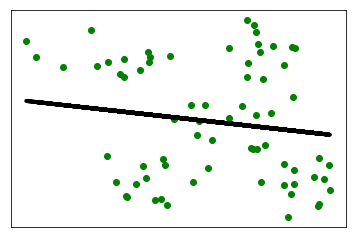

In [7]:
visualize_regressor(y_test_pred, X_test, y_test)

In [99]:
#save model
output_model_file = 'saves/model.pkl' 
with open(output_model_file, 'wb') as f:
    pickle.dump(regressor, f)

In [20]:
#open model
output_model_file = 'saves/amodel.pkl' 
with open(output_model_file, 'rb') as f:
    regressor = pickle.load(f)
